## Лаборторная работа №2 - Первичный анализ данных
#### Вариант: 13

### Цель работы

Изучение программных средств для организации рабочего места специалиста по машинному обучению и анализу данных.

### Задачи 

 - получение программного доступа к данным, содержащимся в источниках различного типа;
 - выполнение предварительного анализа данных и получение обобщенных характеристик наборов данных;
 - исследование простых методов визуализации данных;
 - изучение основных библиотек Python для работы с данными.

### Индивидуальное задание

1. Подберите набор данных на ресурах [2, 3] и согласуйте свой выбор с преподавателем и другими студентами группы, так
как работа над одинаковыми наборами данных недопустима.


*Страница в репозитории:* 
*http://archive.ics.uci.edu/dataset/690/palmer+penguins-3*

*Файл:*
*https://github.com/allisonhorst/palmerpenguins/blob/main/inst/extdata/penguins.csv*

    2.1. Описание набора данных, пояснения, позволяющие лучше понять природу данных.
    Назначение набора данных и возможные модели, которые можно построить на основе данного набора данных (практические задачи, решаемые с использованием данного обучающего набора данных).
    Описание каждого признака и его тип.
    
*Данные были собраны в рамках исследования поведения антарктических пингвинов при поиске пищи и его взаимосвязи с окружающей средой, проведенного в рамках программы долгосрочного экологического мониторинга на станции Палмер в Антарктиде и были финансированы с помощью грантов от Национального научного фонда, Офиса полярных программ (NSF-OPP).*

*Практические задачи, при решении которых может быть полезен этот набор данных:*
- *Прогнозирование местоположения и времени поиска пищи пингвинами.*
- *Изучение влияния климатических изменений на поведение пингвинов.*
- *Анализ взаимосвязи между доступностью пищи и успешностью размножения пингвинов.*
- *Разработка стратегий управления антарктической средой для защиты пингвинов и их мест обитания.*
##### Описание признаков
| Признак            | Описание                                                | Тип данных    |
|--------------------|---------------------------------------------------------|---------------|
| species            | Вид пингвина                                           | Строка (str)  |
| island             | Остров в Palmer Archipelago, Антарктика               | Строка (str)  |
| bill_length_mm     | Длина клюва пингвина в миллиметрах                    | Вещественное число (float)  |
| bill_depth_mm      | Глубина клюва пингвина в миллиметрах                 | Вещественное число (float)  |
| flipper_length_mm  | Длина ласт плавательных лап пингвина в миллиметрах  | Целое число (int)  |
| body_mass_g        | Масса тела пингвина в граммах                         | Целое число (int)  |
| sex                | Пол пингвина (женский или мужской)                   | Строка (str)  |
| year               | Год наблюдения (2007, 2008 или 2009)                 | Целое число (int)  |


    2.2. Форма набора данных: количество элементов набора, количество признаков, количество пропущенных значений, среднее значение отдельных признаков, максимальные и минимальные значения отдельных признаков и прочие показатели.
    Предположения, которые можно сделать, проведя первичный анализ.

In [24]:
import pandas as pd

# Загрузка данных и создание DataFrame с учетом пропусков и предположительных названий колонок
data_path = "penguins.data"
column_names = ['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex', 'year']
df = pd.read_csv(data_path, names=column_names, na_values="NA")

# Форма набора данных
num_samples = df.shape[0]  # Количество элементов набора данных (строк)
num_features = df.select_dtypes(include=[float, int]).shape[1]  # Количество числовых признаков

# Количество пропущенных значений
missing_values = df[numeric_columns].isnull().sum().sum()

# Средние значения отдельных числовых признаков
mean_values = df[numeric_columns].mean()

# Максимальные значения отдельных числовых признаков
max_values = df[numeric_columns].max()

# Минимальные значения отдельных числовых признаков
min_values = df[numeric_columns].min()

# Вывод результатов
print('Форма набора данных:')
print('Количество элементов набора данных:', num_samples)
print('Количество числовых признаков:', num_features)
print('Количество пропущенных значений:', missing_values)

print('\nСредние значения отдельных числовых признаков:')
print(mean_values)

print('\nМаксимальные значения отдельных числовых признаков:')
print(max_values)

print('\nМинимальные значения отдельных числовых признаков:')
print(min_values)


Форма набора данных:
Количество элементов набора данных: 344
Количество числовых признаков: 5
Количество пропущенных значений: 8

Средние значения отдельных числовых признаков:
bill_length_mm         43.921930
bill_depth_mm          17.151170
flipper_length_mm     200.915205
body_mass_g          4201.754386
year                 2008.029070
dtype: float64

Максимальные значения отдельных числовых признаков:
bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
year                 2009.0
dtype: float64

Минимальные значения отдельных числовых признаков:
bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                 2007.0
dtype: float64


    2.3. Графические представления, позволяющие судить о неоднородности исследуемого набора данных.
    
    Построение графиков желательно произвести по нескольким проекциям.

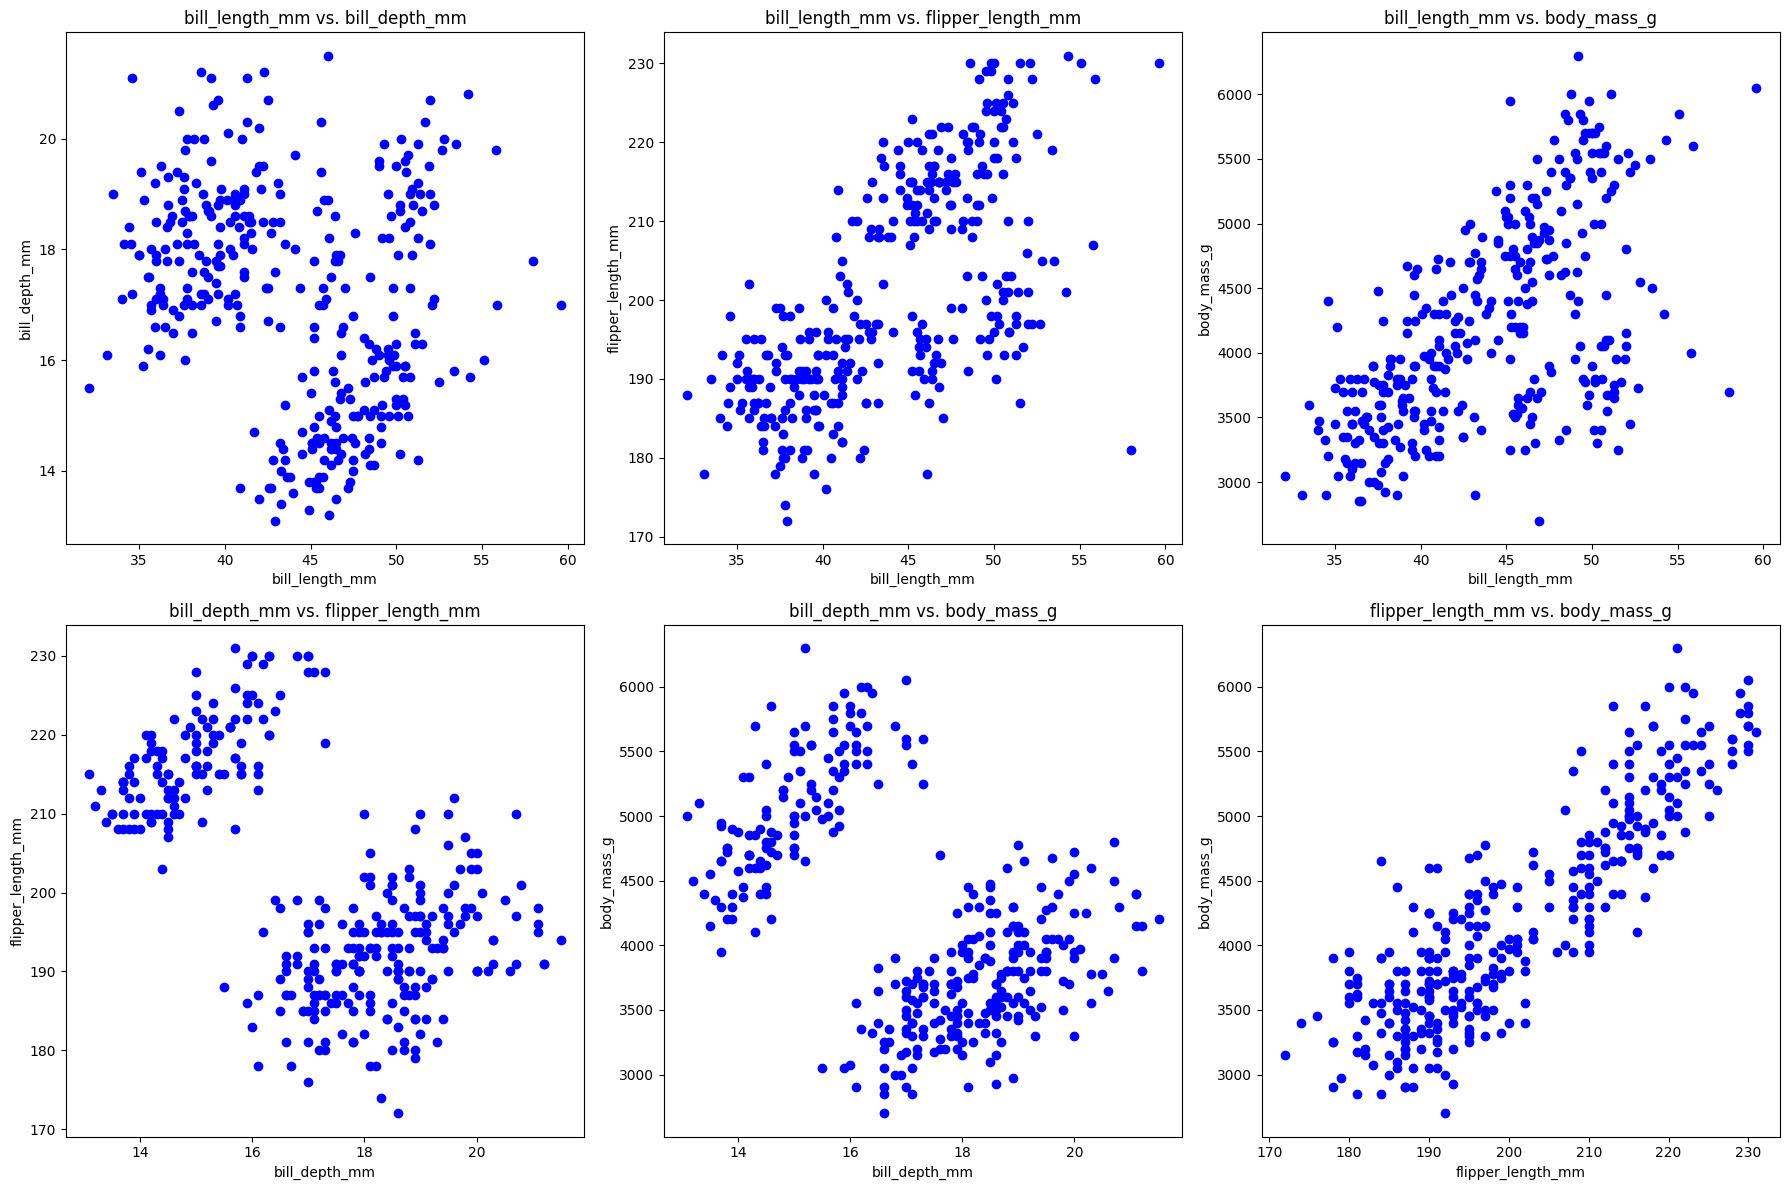

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных и создание DataFrame с учетом пропусков и названий колонок
data_path = "penguins.data"
column_names = ['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex', 'year']
df = pd.read_csv(data_path, names=column_names, na_values="NA")

# Преобразование числовых столбцов в правильный формат
numeric_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Перечисляем интересующие проекции (год не трогаем, как и нечисловые признаки)
projections = [
    ('bill_length_mm', 'bill_depth_mm'),
    ('bill_length_mm', 'flipper_length_mm'),
    ('bill_length_mm', 'body_mass_g'),
    ('bill_depth_mm', 'flipper_length_mm'),
    ('bill_depth_mm', 'body_mass_g'),
    ('flipper_length_mm', 'body_mass_g')
]

plt.figure(figsize=(18, 12))

for i, (x_feature, y_feature) in enumerate(projections, 1):
    plt.subplot(2, 3, i)
    plt.scatter(df[x_feature], df[y_feature], c='b', marker='o')
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.title(f'{x_feature} vs. {y_feature}')

plt.tight_layout()
plt.show()


### Контрольные вопросы
1. **Инструментальные средства для организации рабочего места специалиста Data Science**:

   - *Jupyter Notebook*: Интерактивная среда для разработки, анализа данных и создания отчетов с возможностью выполнения кода по ячейкам. Позволяет удобно проводить эксперименты и визуализировать результаты.

   - *Python*: Основной язык программирования для работы в области Data Science из-за его обширной экосистемы библиотек и инструментов.

   - *Anaconda*: Дистрибутив Python и управляющая среда, предоставляющая доступ к множеству библиотек и инструментов для анализа данных.

   - *Базы данных*: Специалисты Data Science используют различные базы данных, такие как MySQL, PostgreSQL, MongoDB, и т. д., для хранения и управления данными.

   - *Библиотеки визуализации данных*: Например, Matplotlib и Seaborn для создания графиков и визуализации данных.

   - *Среды разработки*: Многие специалисты используют среды разработки, такие как PyCharm и VS Code, для создания и отладки кода.

2. **Библиотеки Python для машинного обучения**:

   - *NumPy*: Библиотека для работы с массивами и матрицами, обеспечивающая высокую производительность вычислений.

   - *Pandas*: Предоставляет структуры данных и функции для анализа и манипуляции данными, такие как DataFrame.

   - *Scikit-Learn*: Библиотека для машинного обучения и анализа данных, содержащая реализации различных алгоритмов машинного обучения.

   - *TensorFlow*: Фреймворк для глубокого обучения и создания нейронных сетей.

   - *Keras*: Высокоуровневый API для работы с глубоким обучением, построенный поверх TensorFlow.

   - *PyTorch*: Фреймворк для глубокого обучения, предоставляющий гибкость и простоту в разработке нейронных сетей.

   - *XGBoost*: Библиотека для градиентного бустинга, широко используется в задачах классификации и регрессии.

3. **Почему при реализации систем машинного обучения широкое распространение получили библиотеки Python**:

   - Большое сообщество и экосистема: Python имеет активное сообщество разработчиков и широкую экосистему библиотек, что делает его идеальным выбором для Data Science.

   - Простота и удобство: Python предоставляет простой и интуитивный синтаксис, что делает его доступным для новичков и опытных разработчиков.

   - Интерактивные инструменты: Jupyter Notebook и другие инструменты обеспечивают интерактивную разработку, что ускоряет процесс анализа данных и разработки моделей машинного обучения.

   - Богатство библиотек: Python имеет богатую экосистему библиотек для работы с данными, машинным обучением и глубоким обучением, что упрощает задачи анализа данных и разработки моделей.

   - Поддержка крупных компаний: Крупные компании, такие как Google (TensorFlow) и Facebook (PyTorch), поддерживают фреймворки глубокого обучения на Python, что усиливает его популярность.
